### Secretary problem or optimal stopping theory visualization
#### More information:
##### https://en.wikipedia.org/wiki/Secretary_problem

##### Book: https://www.amazon.com/Algorithms-Live-Computer-Science-Decisions-ebook/dp/B015CKNWJI

In [1]:
# import libraries
import random, time, sympy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
# Define Monte Carlo parameters
n_samples = 10000
n_iteration = 10000

In [3]:
def FindBestIndex(population:list, threshold:float) -> int:
    """
    this function check if the first best yet value after the threshold (exploration phase) is the total best value or not
    if it is the total best value, then return 1 else return 0
    example:
    population = [1, 4, 2, 7, 3, 9, 2, 12, 10, 5, 6, 8]
    threshold = 0.5
    return 1
    becase the first best yet value after the threshold=0.5 is 12 which is the total best value
    """
    # Find the threshold index
    SelectIndex = int(threshold * len(population))

    # Set best found value to zero (all values are strictly positive)
    BestFound = 0
    if SelectIndex == 0:
        BestFound = population[0]
    else:
        BestFound = max(population[:SelectIndex])
    
    # Loop over after the threshold index and check if the value is the best yet found value
    for num in population[SelectIndex:]:
        if num >= BestFound:
            BestFound = num
            break
    
    # If the loop is finished and the value is not the best yet found value, then return last index
    else:
        BestFound = population[-1]
    
    # If the best found value is the total best value, then return 1 else return 0
    if BestFound == max(population):
        return 1
    else:
        return 0

In [4]:
def MonteCarlo(thresholds:list):
    """
    This function runs the Monte Carlo simulation
    """
    threshs = []
    results = []
    
    for thresh in thresholds:
        threshs.append(thresh)
        res = []
        start = time.time()
        for _ in range(n_iteration):
            sample = [random.random() for _ in range(n_samples)]
            res.append(FindBestIndex(sample, thresh))
        result = sum(res) / len(res)
        results.append(result)
        print(f"For threshold: {thresh}, Chanse to find best is: ({round(result*100, 6)} %) Finished in: {round(time.time() - start, 4)} seconds")
    return threshs, results

In [5]:
# Run Monte Carlo simulation for different thresholds between 0 and 100 percent
threshs, results = MonteCarlo(np.linspace(0, 1, 101))

For threshold: 0.0, Chanse to find best is: (0.0 %) Finished in: 30.9776 seconds
For threshold: 0.01, Chanse to find best is: (4.8 %) Finished in: 29.6204 seconds
For threshold: 0.02, Chanse to find best is: (8.15 %) Finished in: 29.6834 seconds
For threshold: 0.03, Chanse to find best is: (11.12 %) Finished in: 30.6492 seconds
For threshold: 0.04, Chanse to find best is: (13.57 %) Finished in: 28.9457 seconds
For threshold: 0.05, Chanse to find best is: (15.37 %) Finished in: 29.0723 seconds
For threshold: 0.06, Chanse to find best is: (16.9 %) Finished in: 29.3761 seconds
For threshold: 0.07, Chanse to find best is: (19.41 %) Finished in: 29.7185 seconds
For threshold: 0.08, Chanse to find best is: (19.59 %) Finished in: 31.2408 seconds
For threshold: 0.09, Chanse to find best is: (21.49 %) Finished in: 30.2059 seconds
For threshold: 0.1, Chanse to find best is: (22.81 %) Finished in: 30.2925 seconds
For threshold: 0.11, Chanse to find best is: (24.24 %) Finished in: 22.9648 seconds


In [6]:
# theoretical formula for the chance to find the best value
x = sympy.symbols('x')
y = -x*sympy.log(x)
y

-x*log(x)

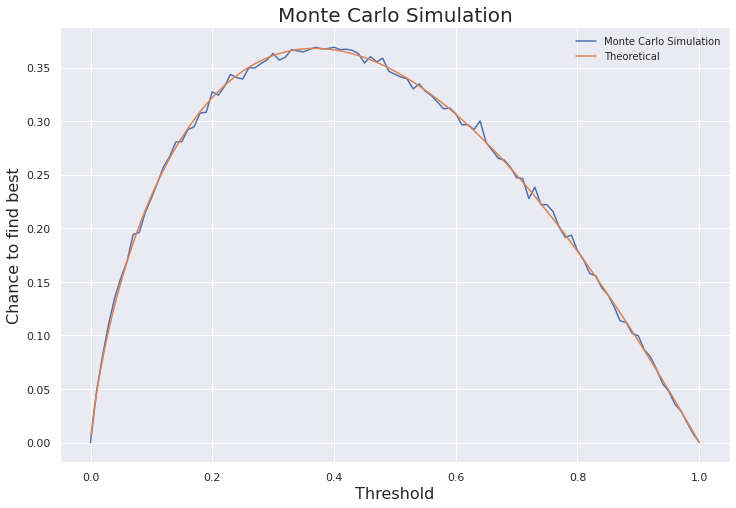

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(x=threshs, y=results, label="Monte Carlo Simulation")
x = np.linspace(0, 1, 1001)[1:]
y = [ -i*np.log(i) for i in x]
sns.lineplot(x=x, y=y, label="Theoretical")
plt.title("Monte Carlo Simulation", fontsize=20)
plt.xlabel("Threshold", fontsize=16)
plt.ylabel("Chance to find best", fontsize=16)
plt.legend(fontsize=10, loc="upper right", frameon=False)
plt.savefig("./Data/MonteCarloSimulation/SecretaryProblem.png", dpi=300)
plt.show()